In [1]:
!pip install yfinance==0.2.44 numpy pandas scikit-learn tensorflow 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=300752 sha256=dfde7f4818d8cd1d08f3834ecfd938309c0a3dcbd4d5f9aff59177b56013df02
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [2]:
import yfinance as yf
import pandas as pd

# Download historical data for multiple stocks
nifty_50_tickers = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "ITC.NS",
    "KOTAKBANK.NS", "LT.NS", "SBIN.NS", "BHARTIARTL.NS", "BAJFINANCE.NS", "ASIANPAINT.NS",
    "AXISBANK.NS", "HCLTECH.NS", "MARUTI.NS", "SUNPHARMA.NS", "TITAN.NS", "ULTRACEMCO.NS",
    "NESTLEIND.NS", "INDUSINDBK.NS", "TATAMOTORS.NS", "ADANIENT.NS", "POWERGRID.NS", "WIPRO.NS",
    "ONGC.NS", "NTPC.NS", "BAJAJFINSV.NS", "HDFCLIFE.NS", "GRASIM.NS", "ADANIGREEN.NS",
    "COALINDIA.NS", "BPCL.NS", "TATASTEEL.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "DIVISLAB.NS",
    "DRREDDY.NS", "EICHERMOT.NS", "BRITANNIA.NS", "APOLLOHOSP.NS", "CIPLA.NS", "BAJAJ-AUTO.NS",
    "HINDALCO.NS", "TECHM.NS", "UPL.NS", "SHREECEM.NS", "ICICIPRULI.NS", "SBILIFE.NS", "M&M.NS"
]
# Download historical adjusted closing prices
data = yf.download(stock_symbols, start="2004-01-01", end="2024-01-01")['Adj Close']

# Calculate correlation matrix
correlation_matrix = data.corr()

# Sort the correlation matrix by the 'AAPL' column
sorted_correlation = correlation_matrix['AAPL'].sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_correlation)


NameError: name 'stock_symbols' is not defined

In [2]:
import yfinance as yf
import pandas as pd

def calculate_sma(data, window):
    return data.rolling(window=window).mean()

def calculate_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def download_and_merge_stocks_with_tech(stock_symbols, start_date='1996-01-01', end_date='2024-10-10'):
    stock_dataframes = []
    valid_stock_symbols = []

    for idx, stock in enumerate(stock_symbols):
        # Download stock data
        data = yf.download(stock, start=start_date, end=end_date)
        print(f"Downloaded data for {stock}:")

        # If data has zero rows or all values are null, skip it
        if data.empty or data.isnull().all().all():
            print(f"Skipping {stock} due to empty or null data.")
            continue

        stock_label = f'Stock{idx + 1}'
        data = data[['Open', 'Close', 'Volume']].rename(columns={
            'Open': f'Open_{stock_label}',
            'Close': f'Close_{stock_label}',
            'Volume': f'Volume_{stock_label}'
        })

        # Calculate technical indicators manually
        data[f'{stock_label}_SMA_20'] = calculate_sma(data[f'Close_{stock_label}'], window=20)
        data[f'{stock_label}_EMA_20'] = calculate_ema(data[f'Close_{stock_label}'], window=10)
        data[f'{stock_label}_RSI'] = calculate_rsi(data[f'Close_{stock_label}'], window=14)
        data[f'Label_{stock_label}'] = (data[f'Open_{stock_label}'].shift(-1) > data[f'Close_{stock_label}']).astype(int)

        # Append to list of valid stock dataframes and symbols
        stock_dataframes.append(data)
        valid_stock_symbols.append(stock)

    # If no valid stocks are left, raise an error
    if not valid_stock_symbols:
        raise ValueError("No valid stock data found after filtering.")

    # Merging all valid stock data into a single dataframe
    merged_data = stock_dataframes[0]
    for df in stock_dataframes[1:]:
        merged_data = pd.merge(merged_data, df, left_index=True, right_index=True)

    # Handle missing data: Forward fill missing values
    merged_data.fillna(method='ffill', inplace=True)

    # Check final data
    print(f"Final data shape after handling missing values: {merged_data.shape}")

    return merged_data, valid_stock_symbols

# Example stock symbols (can be replaced with the actual Nifty 50 list or any other list)
stock_symbols = [
    'ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
    'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 
    'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GAIL.NS', 'GRASIM.NS', 
    'HCLTECH.NS', 'HDFCBANK.NS', 'HDFC.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 
    'HINDPETRO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 
    'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 
    'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SHREECEM.NS', 
    'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TCS.NS', 
    'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]
# stock_symbols=['BPCL.NHS']
# Download the stock data and add technical indicators
data_with_tech, valid_stock_symbols = download_and_merge_stocks_with_tech(stock_symbols)

# Display the first few rows of the merged data
print(data_with_tech.head())
print(f"Valid stocks used for merging: {valid_stock_symbols}")

# Display the final shape of the data
data_with_tech.shape


# print(data_with_tech.head())
data=data_with_tech
data.shape

[*********************100%***********************]  1 of 1 completed


Downloaded data for ADANIPORTS.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for ASIANPAINT.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for AXISBANK.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for BAJAJ-AUTO.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for BAJFINANCE.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for BHARTIARTL.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for BPCL.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for BRITANNIA.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for CIPLA.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for COALINDIA.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for DIVISLAB.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for DRREDDY.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for EICHERMOT.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for GAIL.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for GRASIM.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for HCLTECH.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for HDFCBANK.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for HDFC.NS:
Skipping HDFC.NS due to empty or null data.


[*********************100%***********************]  1 of 1 completed


Downloaded data for HEROMOTOCO.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for HINDALCO.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for HINDPETRO.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for HINDUNILVR.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for ICICIBANK.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for INDUSINDBK.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for INFY.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for ITC.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for JSWSTEEL.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for KOTAKBANK.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for LT.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for M&M.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for MARUTI.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for NTPC.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for ONGC.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for POWERGRID.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for RELIANCE.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for SBIN.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for SHREECEM.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for SUNPHARMA.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for TATACONSUM.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for TATAMOTORS.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for TATAPOWER.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for TCS.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for TECHM.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for TITAN.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for ULTRACEMCO.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for UPL.NS:


[*********************100%***********************]  1 of 1 completed


Downloaded data for WIPRO.NS:
Final data shape after handling missing values: (3433, 322)
            Open_Stock1  Close_Stock1  Volume_Stock1  Stock1_SMA_20  \
Date                                                                  
2010-11-04   161.000000    161.199997         835546     164.889999   
2010-11-08   162.500000    161.399994         613082     163.884998   
2010-11-09   162.500000    162.250000         601933     162.972498   
2010-11-10   162.500000    159.899994         423032     162.149998   
2010-11-11   161.050003    155.399994        1955709     161.322498   

            Stock1_EMA_20  Stock1_RSI  Label_Stock1  Open_Stock2  \
Date                                                               
2010-11-04     159.719516   49.364794             1   269.904999   
2010-11-08     160.025058   52.340015             1   268.700012   
2010-11-09     160.429593   46.459226             1   274.320007   
2010-11-10     160.333302   44.963651             1   275.500000   
2010

/tmp/ipykernel_30/1103045087.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


(3433, 322)

In [3]:
data.shape

(3433, 322)

In [6]:
# Scale the features using MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input, Concatenate, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping



In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Alternatively, use MinMaxScaler

# Assuming 'data' is your DataFrame

# Identify feature columns (exclude 'Label_' columns)
feature_columns = [col for col in data.columns if 'Label_' not in col]

# Create a copy of the DataFrame to avoid modifying the original
data_scaled = data.copy()

# Initialize the scaler
scaler = MinMaxScaler()  # Alternatively, use MinMaxScaler()

# Apply the scaler to the feature columns
data_scaled[feature_columns] = scaler.fit_transform(data[feature_columns])

# Now, data_scaled contains the scaled features and the original 'Label_' columns remain unchanged
print(data_scaled.head())
# data=data_scaled

            Open_Stock1  Close_Stock1  Volume_Stock1  Stock1_SMA_20  \
Date                                                                  
2010-12-03     0.028514      0.026347       0.004579       0.026778   
2010-12-06     0.027767      0.026313       0.002328       0.026273   
2010-12-07     0.027224      0.025436       0.001721       0.025715   
2010-12-08     0.025120      0.022602       0.003351       0.024978   
2010-12-09     0.023151      0.020072       0.006765       0.024190   

            Stock1_EMA_20  Stock1_RSI  Label_Stock1  Open_Stock2  \
Date                                                               
2010-12-03       0.025022    0.441143             1     0.009750   
2010-12-06       0.024857    0.444390             1     0.009171   
2010-12-07       0.024557    0.469195             0     0.009514   
2010-12-08       0.023779    0.423182             1     0.009636   
2010-12-09       0.022667    0.408236             0     0.007807   

            Close_Stock2 

In [12]:
import numpy as np
# Function to create datasets
def create_dataset(data1,data2, time_step, feature_columns, label_columns):
    X, y = [], []
    for i in range(len(data2) - time_step):
        # Append only feature columns for X
        X.append(data1[i:(i + time_step), feature_columns])
        # Append only label columns for y at the end of each sequence
        y.append(data2[i + time_step - 1, label_columns])
    return np.array(X), np.array(y)

# Define the time step
time_step = 60

# Get the indices for feature and label columns
feature_columns = [i for i, col in enumerate(data.columns) if 'Label_' not in col]
label_columns = [i for i, col in enumerate(data.columns) if 'Label_' in col]
data.dropna(inplace=True)
# Create the dataset
X, y = create_dataset(data_scaled.values,data.values, time_step, feature_columns, label_columns)
print(y.shape)

(3354, 46)


In [13]:
# # print(X)
# for i in data.columns:
#     print(i," ",data[i].value_counts())
#     print(data[i].isnull().sum())

In [14]:
# Split data into training, validation, and testing sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

In [15]:
import tensorflow as tf
def quantile_loss(q):
    def loss(y_true, y_pred):
        err = y_true - y_pred
        return tf.reduce_mean(tf.where(err >= 0, q * err, (q - 1) * err))
    return loss


In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, GlobalAveragePooling1D, MultiHeadAttention, LSTM, Attention, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional, TimeDistributed, Concatenate
from tensorflow.keras.optimizers import Adam
num_stocks=46

n = int((num_stocks) )

# Input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Encoding layer to reduce dimensions
x_encoded = TimeDistributed(Dense(n, activation='linear'))(input_layer)
# x_encoded = TimeDistributed(Dense(8, activation='relu'))(x_encoded)

# LSTM and GRU branches
x1 = LSTM(128, return_sequences=False)(input_layer)
x1 = Dropout(0.2)(x1)

x2 = GRU(128, return_sequences=False)(input_layer)
x2 = Dropout(0.2)(x2)

# Concatenate branches
x = Concatenate()([x1, x2])
# x = LSTM(48, return_sequences=False)(x)
x = Dropout(0.2)(x)
x = Dense(48, activation='relu')(x)

# Output layers for binary classification of each stock
outputs = [Dense(1, activation='sigmoid', name=f'stock_{i+1}_output')(x) for i in range(num_stocks)]

# Define the model
model1 = Model(inputs=input_layer, outputs=outputs)

# Use binary cross-entropy loss for binary classification
losses = {f'stock_{i+1}_output': 'binary_crossentropy' for i in range(num_stocks)}

# Define metrics for binary classification
metrics = {f'stock_{i+1}_output': ['accuracy'] for i in range(num_stocks)}

# Define equal loss weights for each stock
loss_weights = {f'stock_{i+1}_output': 1/num_stocks for i in range(num_stocks)}

# Compile the model
model1.compile(
    optimizer=Adam(learning_rate=0.0001, clipnorm=1.0),
    loss=losses,
    metrics=metrics,
    loss_weights=loss_weights)

model1.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 60, 276)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │    207,360 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 128)       │    155,904 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ gru[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 48)        │     12,336 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_1_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_2_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_3_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_4_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_5_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_6_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_7_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_8_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_9_output      │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_10_output     │ (None, 1)         │         49 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stock_11_output     │ (None, 1)         │         49 │ dense_1[0][0]   

 Total params: 377,854 (1.44 MB)

 Trainable params: 377,854 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, GRU, GlobalAveragePooling1D, MultiHeadAttention, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional, TimeDistributed, Concatenate
# from tensorflow.keras.losses import Huber
# from tensorflow.keras.optimizers import Adam

# n = int(len(stock_symbols) / 4)

# # Input layer
# input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
# x_encoded = TimeDistributed(Dense(n, activation='linear'))(input_layer)
# # x_encoded = TimeDistributed(Dense(8, activation='relu'))(x_encoded)
# # Convolutional and LSTM layers
# x = Conv1D(filters=64, kernel_size=7, activation='relu')(x_encoded)
# x = MaxPooling1D(pool_size=4)(x)

# x1 = LSTM(96, return_sequences=True)(x_encoded)
# x1 = Dropout(0.2)(x1)

# x2 = GRU(96, return_sequences=True)(x_encoded)
# x2 = Dropout(0.2)(x2)

# # Concatenate LSTM and GRU branches
# x = Concatenate()([x1, x2])

# # Multi-Head Attention
# # x = MultiHeadAttention(num_heads=3, key_dim=16)(x, x,x)

# # Separate LSTM and Dense layers for each output branch
# outputs = []
# for i in range(num_stocks):
#     branch = LSTM(16, return_sequences=False)(x)  # LSTM layer for each branch
#     branch = Dropout(0.2)(branch)
#     branch = Dense(8, activation='relu')(branch)
#     output = Dense(1, name=f'stock_{i+1}_output')(branch)  # Output for each stock
#     outputs.append(output)

# # Define the model with multiple outputs
# model2 = Model(inputs=input_layer, outputs=outputs)

# # Define the loss for each output using Huber loss
# losses = {f'stock_{i+1}_output': Huber() for i in range(num_stocks)}

# # Define the metrics for each stock's output (e.g., 'mse' for each stock)
# metrics = {f'stock_{i+1}_output': ['mse'] for i in range(num_stocks)}

# # Define the loss weights for each stock to give equal importance
# loss_weights = {f'stock_{i+1}_output': 1 / num_stocks for i in range(num_stocks)}

# # Compile the model with the adjusted losses, metrics, and loss weights
# model2.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss=losses,
#     metrics=metrics,
#     loss_weights=loss_weights
# )

# model2.summary()


In [18]:
# history2 = model2.fit(
#     X_train,
#     y_train_stocks,
#     epochs=50,
#     batch_size=16,
#     validation_data=(X_val, y_val_stocks),
#     shuffle=True,
#     callbacks=[early_stopping]
# )

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Separate target values for each stock output to match the model's expected output format
y_train_stocks = [y_train[:, i] for i in range(num_stocks)]
y_val_stocks = [y_val[:, i] for i in range(num_stocks)]
y_test_stocks = [y_test[:, i] for i in range(num_stocks)]

# Fit the model
history1 = model1.fit(
    X_train,
    y_train_stocks,                  # List of targets for each output
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val_stocks),  # Validation targets in list format
    shuffle=True,
    callbacks=[early_stopping]
)


Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - loss: 0.6902 - stock_10_output_accuracy: 0.4924 - stock_11_output_accuracy: 0.6379 - stock_12_output_accuracy: 0.5087 - stock_13_output_accuracy: 0.4393 - stock_14_output_accuracy: 0.5158 - stock_15_output_accuracy: 0.4778 - stock_16_output_accuracy: 0.5675 - stock_17_output_accuracy: 0.5332 - stock_18_output_accuracy: 0.5424 - stock_19_output_accuracy: 0.4661 - stock_1_output_accuracy: 0.5431 - stock_20_output_accuracy: 0.5450 - stock_21_output_accuracy: 0.5410 - stock_22_output_accuracy: 0.4351 - stock_23_output_accuracy: 0.5534 - stock_24_output_accuracy: 0.5565 - stock_25_output_accuracy: 0.4965 - stock_26_output_accuracy: 0.5185 - stock_27_output_accuracy: 0.4458 - stock_28_output_accuracy: 0.6533 - stock_29_output_accuracy: 0.5750 - stock_2_output_accuracy: 0.5641 - stock_30_output_accuracy: 0.5306 - stock_31_output_accuracy: 0.5195 - stock_32_output_accuracy: 0.5830 - stock_33_output_accuracy: 0.4969 - stock_34_output_accu

In [20]:
# y_pred_stocks

In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate metrics and store results in a DataFrame for binary classification
def evaluate_metrics_table(y_test, y_pred, stock_name, metrics_df):
    # Apply threshold at 0.5 for binary classification
    y_pred_class = y_pred > 0.5
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class, zero_division=0)
    recall = recall_score(y_test, y_pred_class, zero_division=0)
    f1 = f1_score(y_test, y_pred_class)
    
    # Create a temporary DataFrame to hold the new row of results
    temp_df = pd.DataFrame({
        'Stock': [stock_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-score': [f1]
    })
    # Concatenate the new row with the existing metrics_df
    metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)
    
    return metrics_df

# Initialize an empty DataFrame to store metrics for each stock
metrics_df = pd.DataFrame(columns=['Stock', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Make predictions for the test set
y_pred_stocks = model1.predict(X_test)

# Evaluate metrics for each stock and store them in the DataFrame
for i in range(num_stocks):
    metrics_df = evaluate_metrics_table(y_test_stocks[i], y_pred_stocks[i], f'Stock_{i+1}', metrics_df)

# Display the metrics as a table
print("Model-1 Performance Metrics")
print(metrics_df)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


/tmp/ipykernel_30/1699537929.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)


Model-1 Performance Metrics
       Stock  Accuracy  Precision    Recall  F1-score
0    Stock_1  0.767857   0.767857  1.000000  0.868687
1    Stock_2  0.559524   0.559524  1.000000  0.717557
2    Stock_3  0.563492   0.563492  1.000000  0.720812
3    Stock_4  0.615079   0.615079  1.000000  0.761671
4    Stock_5  0.634921   0.634921  1.000000  0.776699
5    Stock_6  0.565476   0.567729  0.993031  0.722433
6    Stock_7  0.642857   0.658281  0.948640  0.777228
7    Stock_8  0.607143   0.607143  1.000000  0.755556
8    Stock_9  0.676587   0.676587  1.000000  0.807101
9   Stock_10  0.674603   0.674603  1.000000  0.805687
10  Stock_11  0.589286   0.589286  1.000000  0.741573
11  Stock_12  0.650794   0.650794  1.000000  0.788462
12  Stock_13  0.611111   0.611111  1.000000  0.758621
13  Stock_14  0.664683   0.664683  1.000000  0.798570
14  Stock_15  0.490079   0.605042  0.469055  0.528440
15  Stock_16  0.581349   0.581349  1.000000  0.735257
16  Stock_17  0.533730   0.533730  1.000000  0.695990


In [22]:
# Descriptive statistics for accuracy
accuracy_stats = metrics_df['Accuracy'].describe()
print("Accuracy Distribution Summary:")
print(accuracy_stats)


Accuracy Distribution Summary:
count    46.000000
mean      0.616115
std       0.066631
min       0.434524
25%       0.566964
50%       0.621032
75%       0.656746
max       0.767857
Name: Accuracy, dtype: float64


In [24]:
# Descriptive statistics for accuracy
accuracy_stats = metrics_df['F1-score'].describe()
print("Accuracy Distribution Summary:")
print(accuracy_stats)


Accuracy Distribution Summary:
count    46.000000
mean      0.742298
std       0.118829
min       0.053156
25%       0.720369
50%       0.760710
75%       0.792814
max       0.868687
Name: F1-score, dtype: float64


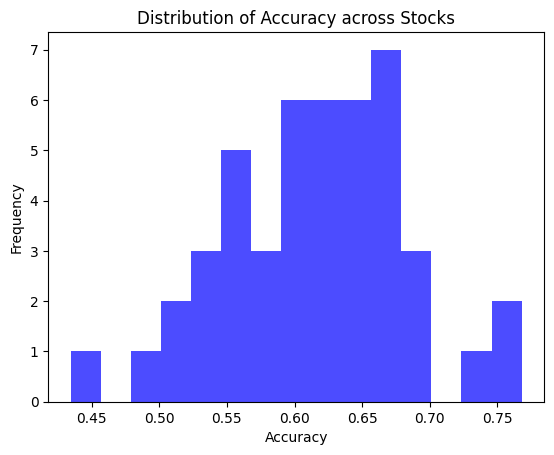

In [23]:
import matplotlib.pyplot as plt

plt.hist(metrics_df['Accuracy'], bins=15, alpha=0.7, color='blue')
plt.title('Distribution of Accuracy across Stocks')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


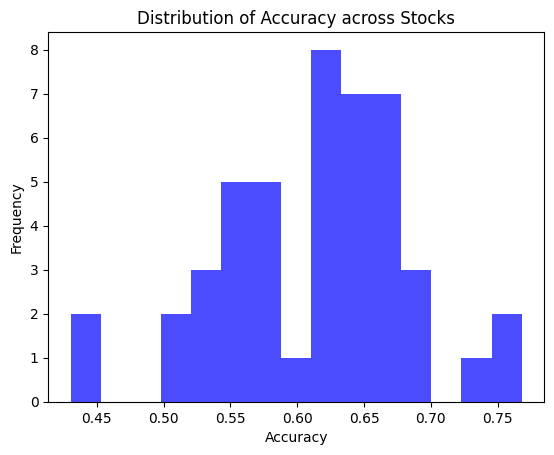

In [50]:
import matplotlib.pyplot as plt

plt.hist(metrics_df['Accuracy'], bins=15, alpha=0.7, color='blue')
plt.title('Distribution of Accuracy across Stocks')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


In [31]:
from sklearn.metrics import roc_auc_score, average_precision_score

auc_roc = roc_auc_score(y_test, y_pred_class)
auc_pr = average_precision_score(y_test, y_pred_class)

print(f"AUC-ROC: {auc_roc}")
print(f"AUC-PR: {auc_pr}")


NameError: name 'y_pred_class' is not defined

In [32]:
print(y_pred_stocks[:10])  # Print first few predictions to check


[array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
     

In [ ]:
import matplotlib.pyplot as plt

# Extract keys related to validation loss from the history
val_loss_keys = [key for key in history1.history.keys() if 'val_' in key and 'loss' in key]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot overall validation loss first if present
if 'val_loss' in history1.history:
    plt.plot(history1.history['val_loss'], label='Overall Val Loss')

# Loop through each validation loss key and plot the loss for each stock output
for key in val_loss_keys:
    if key != 'val_loss':  # Exclude the overall validation loss, if plotted already
        stock_label = key.split('_output_')[0].replace('val_', '').title()  # Dynamically create stock labels
        plt.plot(history1.history[key], label=f'{stock_label} Val Loss')

# Customize the plot
plt.title('Model Validation Loss for Each Output Head')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
predictions = model1.predict(X_test)

# Initialize the figure for plotting
plt.figure(figsize=(15, 5 * num_stocks))  # Adjust the height dynamically based on the number of stocks

# Loop through each stock and plot
for i in range(num_stocks):
    plt.subplot(num_stocks, 1, i + 1)  # Create subplot for each stock dynamically
    plt.plot(y_test_stocks[i], label=f'Actual Stock {i+1}', color='blue')
    plt.plot(predictions[i], label=f'Predicted Stock {i+1}', color='orange')
    plt.title(f'Stock {i+1}: Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
model1.save("lstm_1_app7_80_noattention.h5")

In [15]:
# Inspect model weights for NaNs
for layer in model1.layers:
    weights = layer.get_weights()
    if any(np.isnan(w).any() for w in weights):
        print(f"NaNs found in weights of layer: {layer.name}")


NameError: name 'model1' is not defined